In [1]:
!pip install librosa soundfile audiomentations pydub

In [2]:
import librosa
import librosa.display
import soundfile as sf
from audiomentations import Compose, PitchShift, TimeStretch, AddGaussianNoise, Shift
import os 
import random
import numpy as np
import IPython
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
 

In [3]:
real_positive_directory = './Dataset/positive_real'
generated_positive_directory = './Dataset/positive_generated'
negative_directory = './Dataset/negatives'
backgrounds_directory = './Dataset/backgrounds'

backgrounds_files = [backgrounds_directory+"/"+f for f in os.listdir(backgrounds_directory) if f.endswith('.wav')]
negative_files = [negative_directory+"/"+f for f in os.listdir(negative_directory) if f.endswith('.wav')]

# Check sample rate of negative and backgrounds

In [4]:
def get_sample_rate(base_path):
    """
    Get unique sample rates from all WAV files in a directory.
    
    Args:
        base_path (str): Path to directory containing WAV files
        
    Returns:
        list: List of unique sample rates found in the audio files
    """
    _files = [f for f in os.listdir(base_path) if f.endswith('.wav')]
    sample_rates = []
    for file_name in _files:
        file_path = f"{base_path}/{file_name}"
        _, sr = librosa.load(file_path)
        sample_rates.append(sr)

    sample_rates = list(set(sample_rates))
    return sample_rates

In [5]:
get_sample_rate(negative_directory)

[22050]

In [6]:
get_sample_rate(real_positive_directory)


[22050]

In [7]:
get_sample_rate(backgrounds_directory)


[22050]

# Augment positive samples

In [8]:
real_positive_directory = './Dataset/positive_real'
generated_positive_directory = './Dataset/positive_generated'
wav_files = [f for f in os.listdir(real_positive_directory) if f.endswith('.wav')]
wav_files

['positive_1.wav', 'positive_2.wav', 'positive_3.wav', 'positive_4.wav']

In [9]:
# for file_name in wav_files:
#     file_path = f"{real_positive_directory}/{file_name}"
#     print(f"Augmenting file : {file_path}")
    
#     signal, sr = librosa.load(file_path)
#     print(f"Sample rate : {sr}")
    
#     # Using pitch shift to create voice variations
#     # Docs: https://pypi.org/project/audiomentations/
#     augment = Compose([
#         PitchShift(min_semitones=-6, max_semitones=6, p=1),
        
#         # Uncomment below for more aggressive augmentations:
#         # TimeStretch(min_rate=0.5, max_rate=1.5, p=0.8),  # speed changes
#         # Shift(min_shift=-1, max_shift=1, p=0.8),  # temporal shifts
#         # AddGaussianNoise(min_amplitude=0.0001, max_amplitude=0.0015, p=0.5),  # background noise
#     ])

#     # Generate 10 variations per sample
#     base_name = file_name.replace(".wav","")
#     for i in range(10):
#         random.seed(i) 
#         np.random.seed(i)
    
#         augmented_signal = augment(samples=signal, sample_rate=sr)
#         sf.write(f"{generated_positive_directory}/{base_name}_{i}.wav", augmented_signal, sr)

In [10]:
for file_name in wav_files:
    file_path = f"{real_positive_directory}/{file_name}"
    print(f"Augmenting file : {file_path}")
    
    signal, sr = librosa.load(file_path)
    print(f"Sample rate : {sr}")
    
    # Using pitch shift to create voice variations
    # Docs: https://pypi.org/project/audiomentations/
    augment = Compose([
        PitchShift(min_semitones=-6, max_semitones=6, p=1),
        
        # Uncomment below for more aggressive augmentations:
        TimeStretch(min_rate=0.5, max_rate=1.5, p=0.8),  # speed changes
        Shift(min_shift=-1, max_shift=1, p=0.8),  # temporal shifts
        # AddGaussianNoise(min_amplitude=0.0001, max_amplitude=0.0015, p=0.5),  # background noise
    ])

    # Generate 10 variations per sample
    base_name = file_name.replace(".wav","")
    for i in range(50):
        random.seed(i) 
        np.random.seed(i)
    
        augmented_signal = augment(samples=signal, sample_rate=sr)
        sf.write(f"{generated_positive_directory}/{base_name}_{i}.wav", augmented_signal, sr)

Augmenting file : ./Dataset/positive_real/positive_1.wav
Sample rate : 22050
Augmenting file : ./Dataset/positive_real/positive_2.wav
Sample rate : 22050
Augmenting file : ./Dataset/positive_real/positive_3.wav
Sample rate : 22050
Augmenting file : ./Dataset/positive_real/positive_4.wav
Sample rate : 22050


In [11]:
get_sample_rate(generated_positive_directory)

[22050]

# Visual analysis on signal

In [12]:

wav_files = [f"{real_positive_directory}/{f}" for f in os.listdir(real_positive_directory) if f.endswith('.wav')]
wav_files = list(random.sample(wav_files, 2))
files_no_ext = {f.replace(".wav","").split("/")[-1] : [] for f in wav_files}
print("original audio : ",wav_files)
print("original audio  NO ext: ",files_no_ext)

# Match generated files back to their originals
generated_wav_files = [f"{generated_positive_directory}/{f}" for f in os.listdir(generated_positive_directory) if f.endswith('.wav')]
filtered_gen_wav = []
for f in generated_wav_files:
    f_filtered = '_'.join(f.replace(".wav","").split("_")[:-1]).split("/")[-1]
    if f_filtered in files_no_ext:
        files_no_ext[f_filtered].append(f)
files_no_ext

original audio :  ['./Dataset/positive_real/positive_3.wav', './Dataset/positive_real/positive_1.wav']
original audio  NO ext:  {'positive_3': [], 'positive_1': []}


{'positive_3': ['./Dataset/positive_generated/positive_3_0.wav',
  './Dataset/positive_generated/positive_3_1.wav',
  './Dataset/positive_generated/positive_3_10.wav',
  './Dataset/positive_generated/positive_3_11.wav',
  './Dataset/positive_generated/positive_3_12.wav',
  './Dataset/positive_generated/positive_3_13.wav',
  './Dataset/positive_generated/positive_3_14.wav',
  './Dataset/positive_generated/positive_3_15.wav',
  './Dataset/positive_generated/positive_3_16.wav',
  './Dataset/positive_generated/positive_3_17.wav',
  './Dataset/positive_generated/positive_3_18.wav',
  './Dataset/positive_generated/positive_3_19.wav',
  './Dataset/positive_generated/positive_3_2.wav',
  './Dataset/positive_generated/positive_3_20.wav',
  './Dataset/positive_generated/positive_3_21.wav',
  './Dataset/positive_generated/positive_3_22.wav',
  './Dataset/positive_generated/positive_3_23.wav',
  './Dataset/positive_generated/positive_3_24.wav',
  './Dataset/positive_generated/positive_3_25.wav',
 

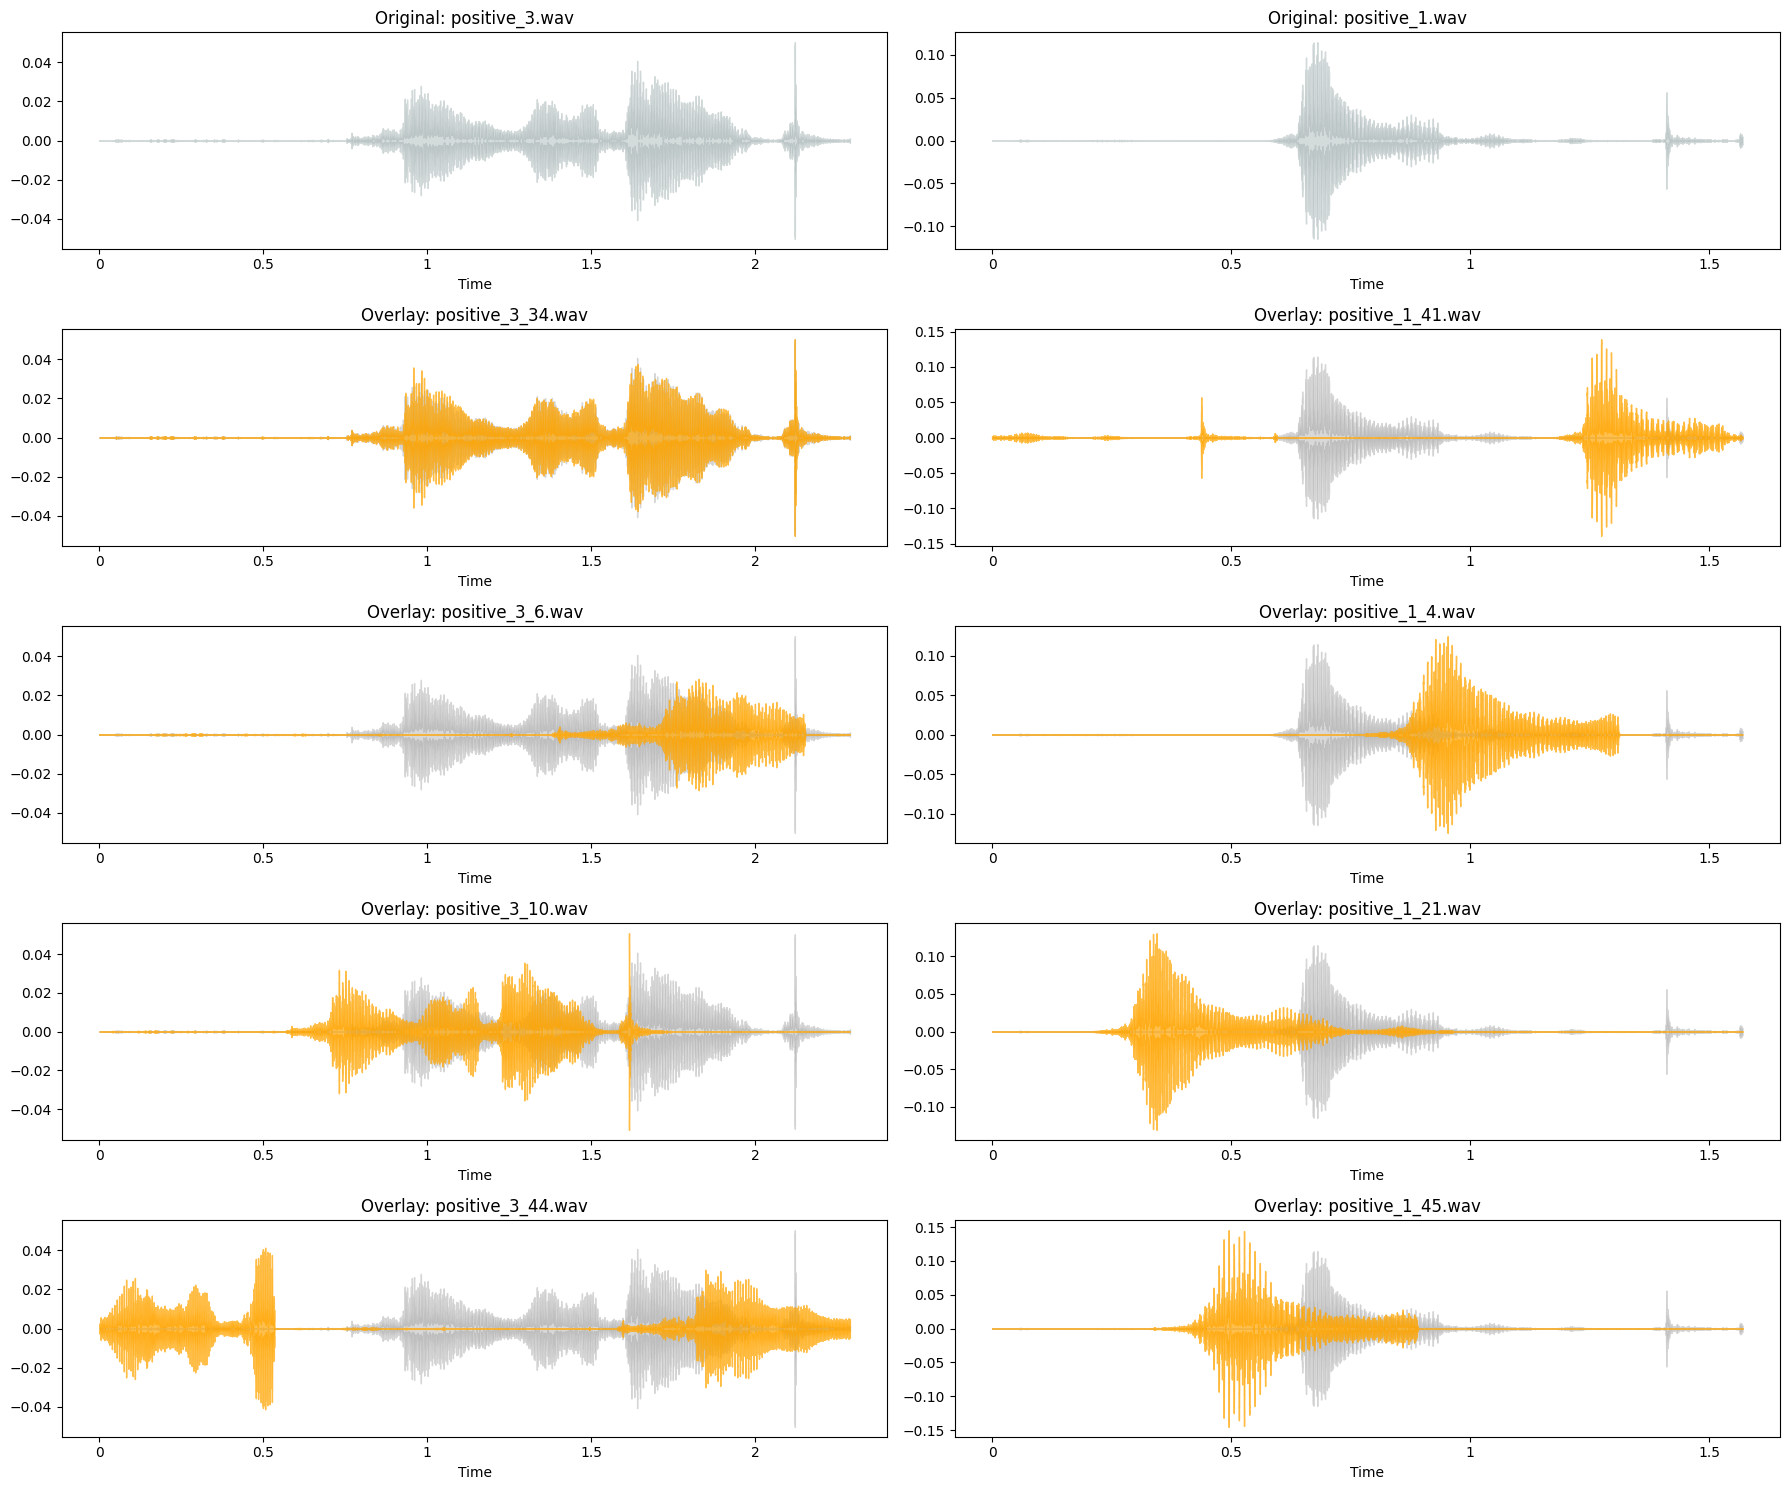

In [13]:
x_axis = 4
height = 3 * (x_axis + 1)
COLOR_ORIG = '#95a5a6'
COLOR_GEN  = '#d35400'

fig, ax = plt.subplots(x_axis + 1, len(wav_files), figsize=(18, height))

gen_sample_dic = {}

for j, file in enumerate(wav_files):
    y_orig, sr = librosa.load(file)
    file_name = file.split("/")[-1]
    
    # Top row: original waveform
    librosa.display.waveshow(y_orig, sr=sr, ax=ax[0, j], color=COLOR_ORIG, alpha=0.4)
    ax[0, j].set_title(f"Original: {file_name}")

    k = file_name.replace(".wav", "")
    gen_sample_dic[k] = random.sample(files_no_ext[k], x_axis)
    
    # Rows below: overlay augmented on top of original
    for i_gen, gen_file_path in enumerate(gen_sample_dic[k]):
        row = i_gen + 1
        
        y_gen, sr = librosa.load(gen_file_path)
        gen_name = gen_file_path.split("/")[-1]

        # Plot original (gray) then augmented (orange) on top
        librosa.display.waveshow(y_orig, sr=sr, ax=ax[row, j], color='gray', alpha=0.3, label='Original')
        librosa.display.waveshow(y_gen, sr=sr, ax=ax[row, j], color='orange', alpha=0.7, label='Augmented')
        
        ax[row, j].set_title(f"Overlay: {gen_name}")

fig.tight_layout()
plt.show()

Difference between the signal 

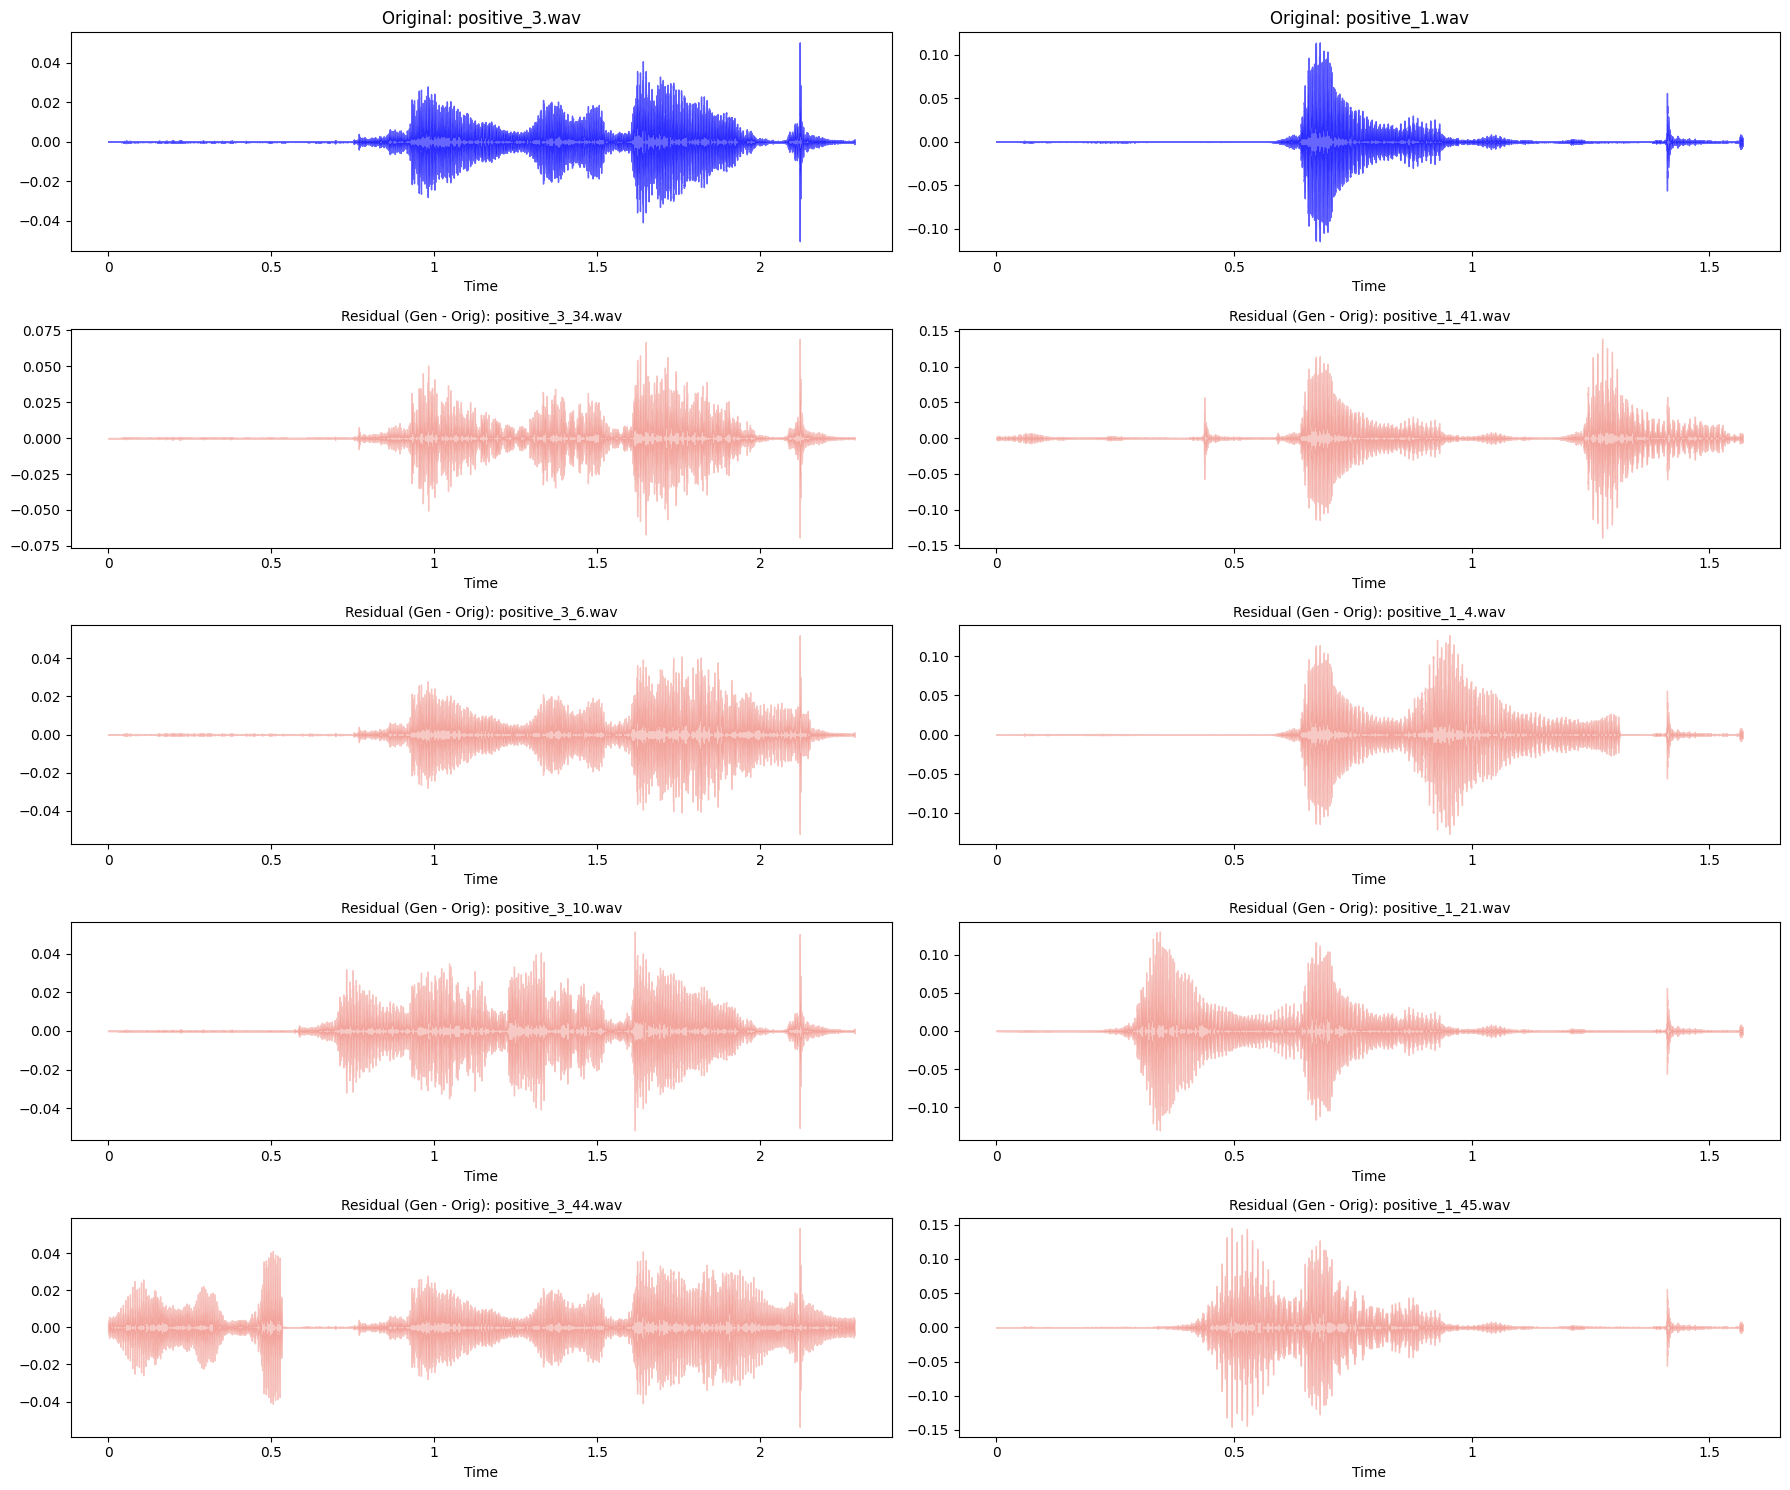

In [14]:
COLOR_DIFF = '#e74c3c'

fig, ax = plt.subplots(x_axis + 1, len(wav_files), figsize=(18, height))

# Handle edge case where we only have one file
if len(wav_files) == 1:
    ax = ax.reshape(-1, 1)

for j, file in enumerate(wav_files):
    y_orig, sr = librosa.load(file)
    file_name = file.split("/")[-1]
    
    librosa.display.waveshow(y_orig, sr=sr, ax=ax[0, j], color='blue', alpha=0.6)
    ax[0, j].set_title(f"Original: {file_name}")

    k = file_name.replace(".wav", "")

    for i_gen, gen_file_path in enumerate(gen_sample_dic[k]):
        row = i_gen + 1
        y_gen, _ = librosa.load(gen_file_path, sr=sr)
        
        # Pad waveforms to same length before calculating difference
        max_len = max(len(y_orig), len(y_gen))
        y_orig_pad = np.pad(y_orig, (0, max_len - len(y_orig)))
        y_gen_pad = np.pad(y_gen, (0, max_len - len(y_gen)))
        
        y_diff = y_gen_pad - y_orig_pad
        
        librosa.display.waveshow(y_diff, sr=sr, ax=ax[row, j], color=COLOR_DIFF, alpha=0.3)
        
        gen_name = gen_file_path.split("/")[-1]
        ax[row, j].set_title(f"Residual (Gen - Orig): {gen_name}", fontsize=10)

fig.tight_layout()
plt.show()

# Visualize Spectogram  - Mel Spectrograms for Trigger Word Detection



## What is the Mel Scale?

The Mel scale is a perceptual pitch scale that mimics human hearing. Unlike the linear Hertz scale, it's roughly linear at low frequencies (<1000 Hz) and logarithmic at high frequencies, reflecting how humans perceive pitch differences more sensitively at lower frequencies.

**Key principle:** Equal distances on the Mel scale = equal perceived pitch steps to humans.

## What is a Mel Spectrogram?

A Mel spectrogram is a time-frequency representation of audio where:
- **Horizontal axis:** Time (controlled by `hop_length`)
- **Vertical axis:** Frequency bins grouped into Mel bands (controlled by `n_mels`)
- **Intensity:** Energy/amplitude at each time-frequency point

Unlike regular spectrograms that use linear frequency spacing, Mel spectrograms use perceptually-motivated frequency bins.

## Key Parameters

### `n_mels`
- **Definition:** Number of Mel frequency bands (vertical resolution)
- **Common values:** 40 (speech), 80-128 (music/complex audio)
- **Effect:** Controls how much frequency detail is captured

### `hop_length`
- **Definition:** Audio samples between successive analysis windows
- **Effect:** Controls time resolution (smaller = finer time detail, larger = more compression)

### `n_fft`
- **Definition:** FFT window size for frequency analysis
- **Constraint:** `n_mels` should be ≤ `n_fft/2` to avoid redundancy

## Why Mel Spectrograms for Trigger Word Detection?

### Advantages over Raw Audio/Linear Spectrograms

1. **Perceptual Alignment:** Matches how humans distinguish words, making relevant features more prominent
2. **Dimensionality Reduction:** Compresses thousands of frequency points into 40-128 bins without losing critical speech information
3. **Computational Efficiency:** Smaller input size = faster training and inference
4. **Better Generalization:** Focuses on frequencies important for speech recognition, reducing noise from irrelevant high-frequency components
5. **Proven Architecture Compatibility:** Standard input for CNNs/RNNs in audio classification tasks

## Pros and Cons

### Pros
- **Human-centric representation:** Better captures speech characteristics
- **Compact:** Significantly smaller than raw audio waveforms
- **Robust to noise:** Mel filtering acts as preprocessing that emphasizes speech-relevant frequencies
- **Transfer learning friendly:** Pre-trained models often expect Mel spectrograms
- **Interpretable:** Visual patterns correspond to phonetic features

### Cons

#### Inherent Trade-offs (Always True)
- **Information loss:** High-frequency details are compressed (severity depends on `n_mels` choice)
  - Lower `n_mels` = more compression, less detail
  - Higher `n_mels` = more detail retained, but still perceptually filtered
  - *For trigger word detection, this is often desirable as it discards speaker-specific nuances*

- **Not invertible:** Cannot perfectly reconstruct original audio from Mel spectrogram
  - The Mel filtering process is inherently lossy regardless of parameters
  - Unlike STFT, this transformation is one-way only

- **Fixed representation:** Once computed, cannot adapt to different frequency resolutions
  - Raw audio can be re-analyzed with different parameters
  - Mel spectrograms are locked into the chosen frequency binning

#### Parameter-Dependent Challenges
- **Parameter sensitivity:** Performance depends on proper tuning of `n_mels`, `hop_length`, `n_fft`
  - Poor choices (e.g., `n_mels=10` or `hop_length=8000`) severely degrade model performance
  - Optimal values vary by task (speech vs. music vs. environmental sounds)

- **Computation overhead:** Requires additional preprocessing compared to raw waveforms
  - Higher `n_mels` and lower `hop_length` increase processing time
  - Trade-off between detail and efficiency

## Recommended Settings for Trigger Word Detection

```python
import librosa

# Typical configuration for wake word detection
n_mels = 40          # Sufficient for speech recognition
hop_length = 512     # ~10-25ms time steps (at 22050 Hz)
n_fft = 2048         # Covers fundamental frequencies of speech
sr = 22050           # Sample rate (standard for speech)

mel_spec = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=n_mels,
    hop_length=hop_length,
    n_fft=n_fft
)
```

**Why these values?**
- `n_mels=40`: Captures essential speech formants without over-complicating the model
- `hop_length=512`: Balances temporal resolution with computational cost
- Human speech fundamentals are typically 80-300 Hz with harmonics up to ~8 kHz, which these parameters cover well


In [15]:
hop_length = 256 
n_mels = 256

def get_mels_spectogram(file):
    """
    Generate Mel spectrogram from an audio file.
    
    Args:
        file (str): Path to the audio file
        
    Returns:
        tuple: Contains:
            - y_orig (np.ndarray): Original audio time series
            - S_orig (np.ndarray): Mel spectrogram
            - S_dB_orig (np.ndarray): Mel spectrogram in decibels
            - sr (int): Sample rate of the audio file
    """
    y_orig, sr = librosa.load(file)
    S_orig = librosa.feature.melspectrogram(y=y_orig, sr=sr, n_mels=n_mels, hop_length=hop_length)
    S_dB_orig = librosa.power_to_db(S_orig, ref=np.max)
    return y_orig, S_orig, S_dB_orig, sr

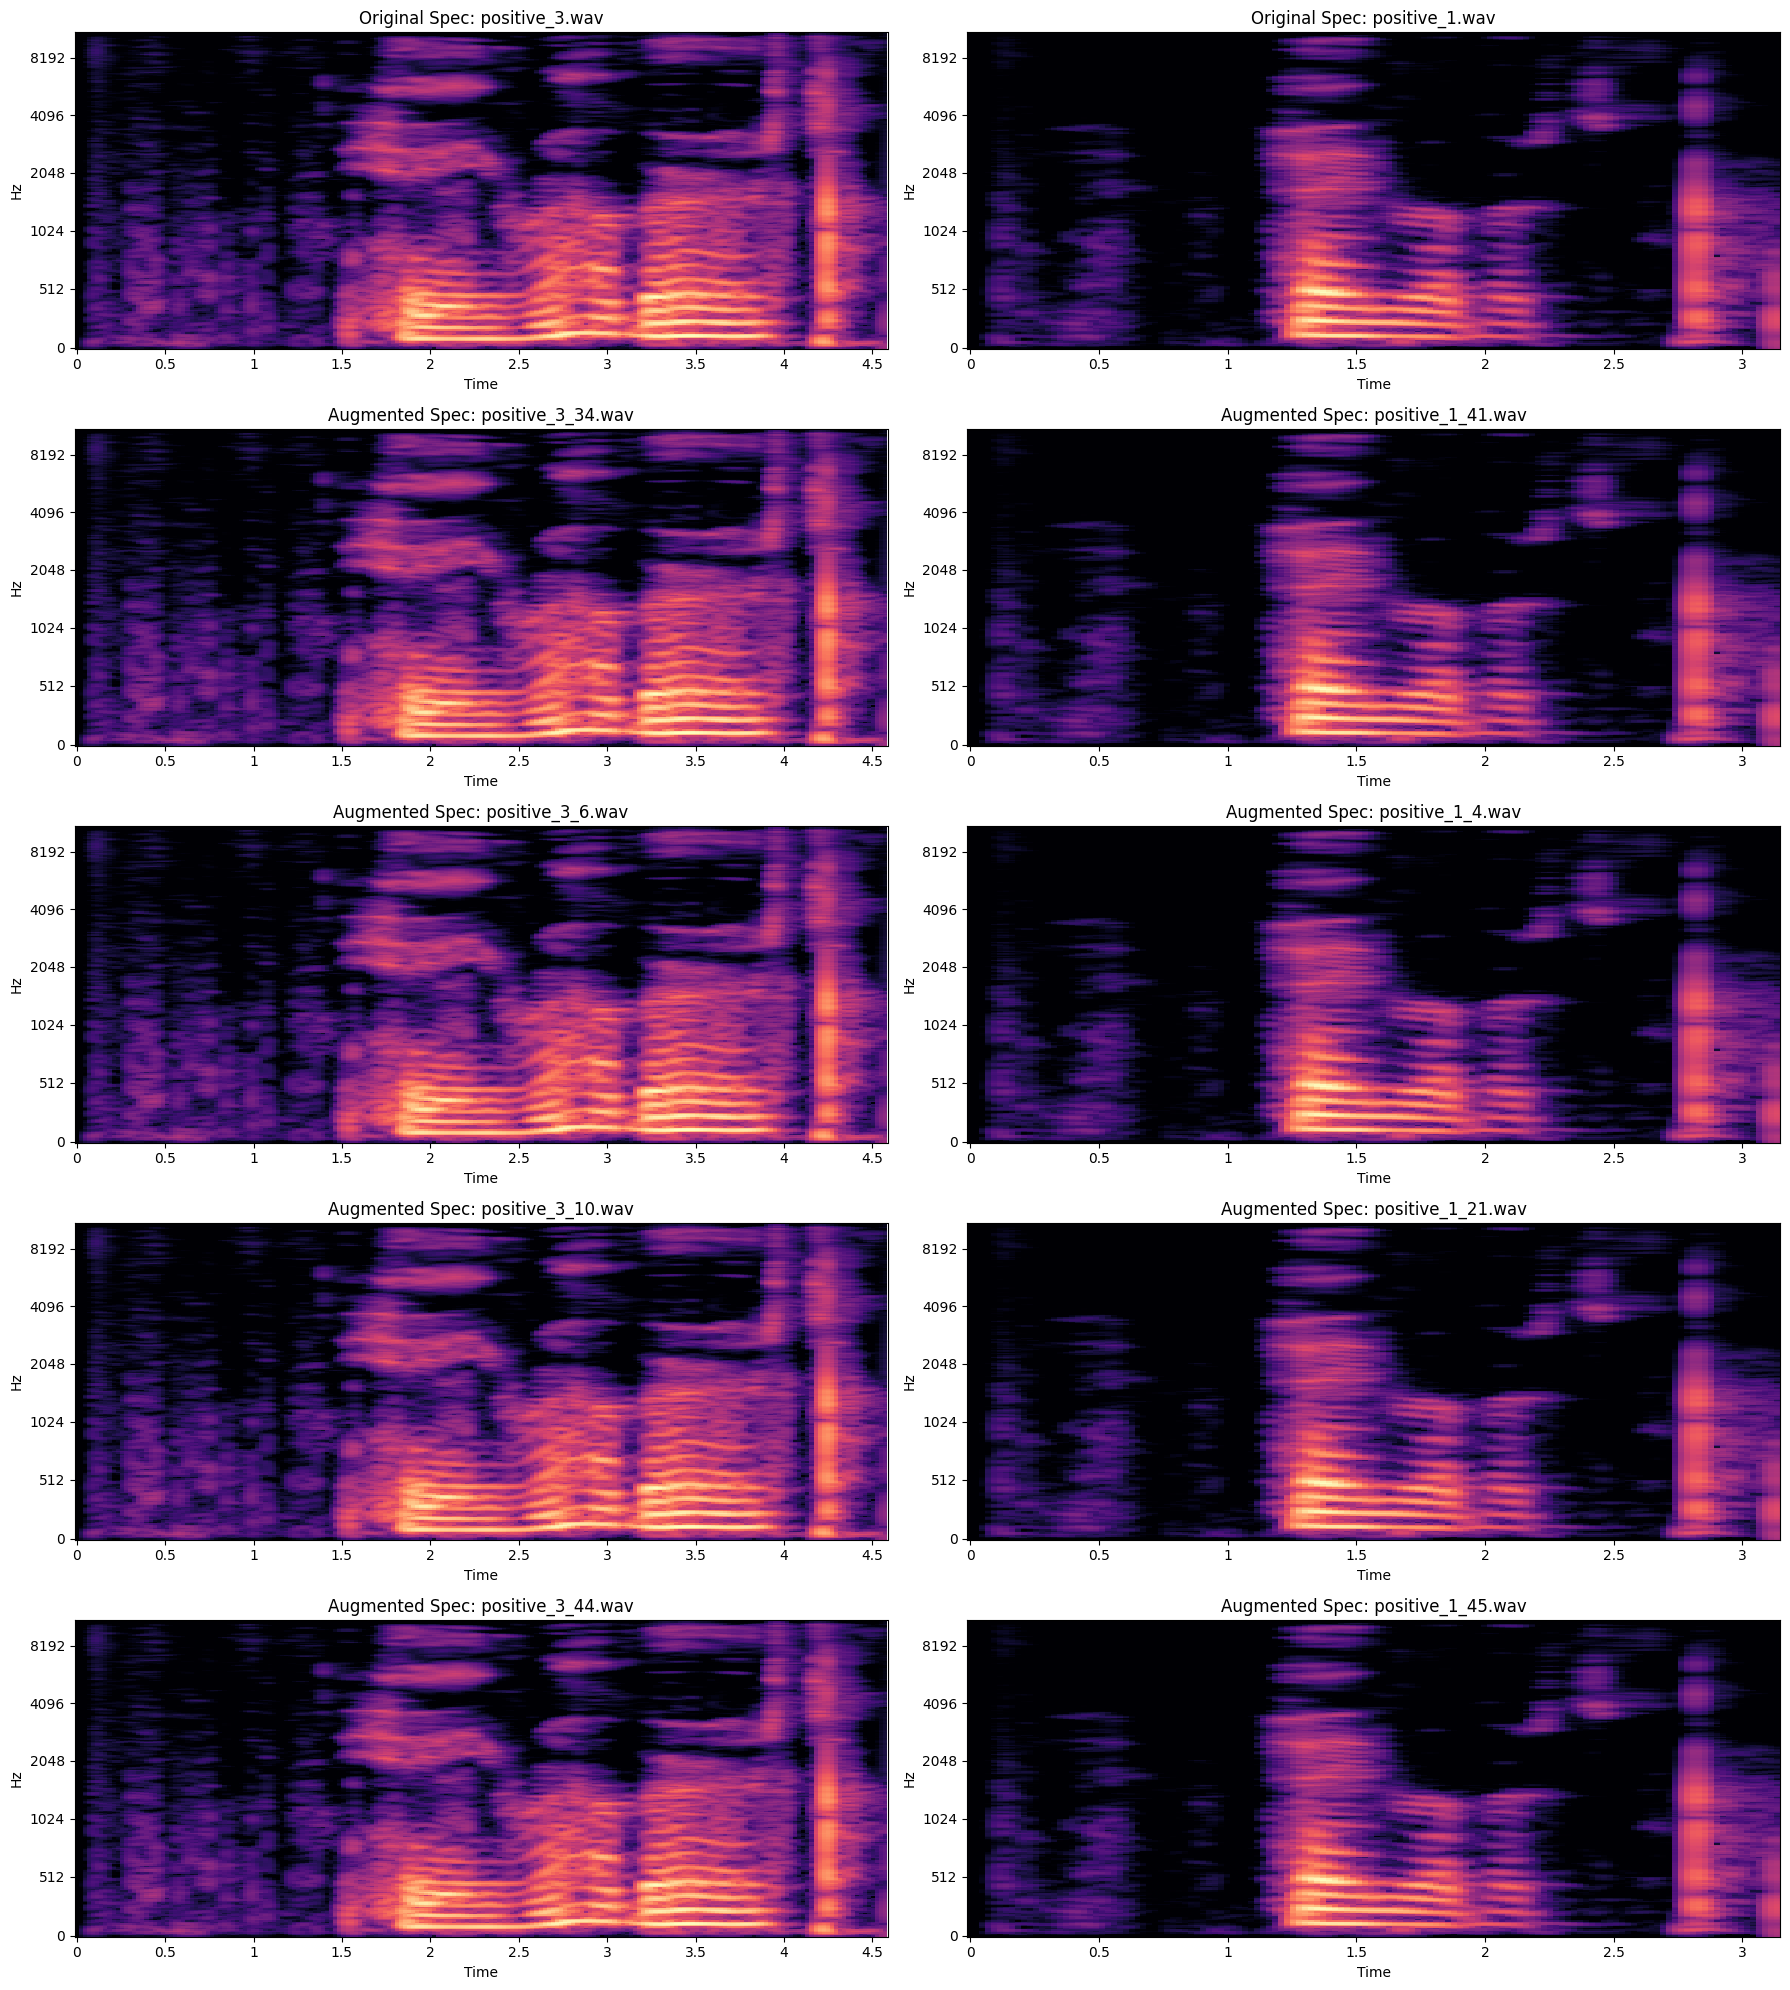

In [16]:

height = 4 * (x_axis + 1)
fig, ax = plt.subplots(x_axis + 1, len(wav_files), figsize=(18, height))

for j, file in enumerate(wav_files):
    y_orig, S_orig, S_dB_orig , sr= get_mels_spectogram(file)
    file_name = file.split("/")[-1]
    
    img = librosa.display.specshow(S_dB_orig, sr=sr, x_axis='time', y_axis='mel', ax=ax[0, j])
    ax[0, j].set_title(f"Original Spec: {file_name}")

    k = file_name.replace(".wav", "")

    for i_gen, gen_file_path in enumerate(gen_sample_dic[k]):
        row = i_gen + 1

        y_gen, S_gen, S_dB_gen, sr = get_mels_spectogram(file)
        gen_name = gen_file_path.split("/")[-1]
        librosa.display.specshow(S_dB_gen, sr=sr, x_axis='time', y_axis='mel', ax=ax[row, j], cmap='magma')
        
        ax[row, j].set_title(f"Augmented Spec: {gen_name}")

fig.tight_layout()
plt.show()

/tmp/ipykernel_105878/2211339517.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


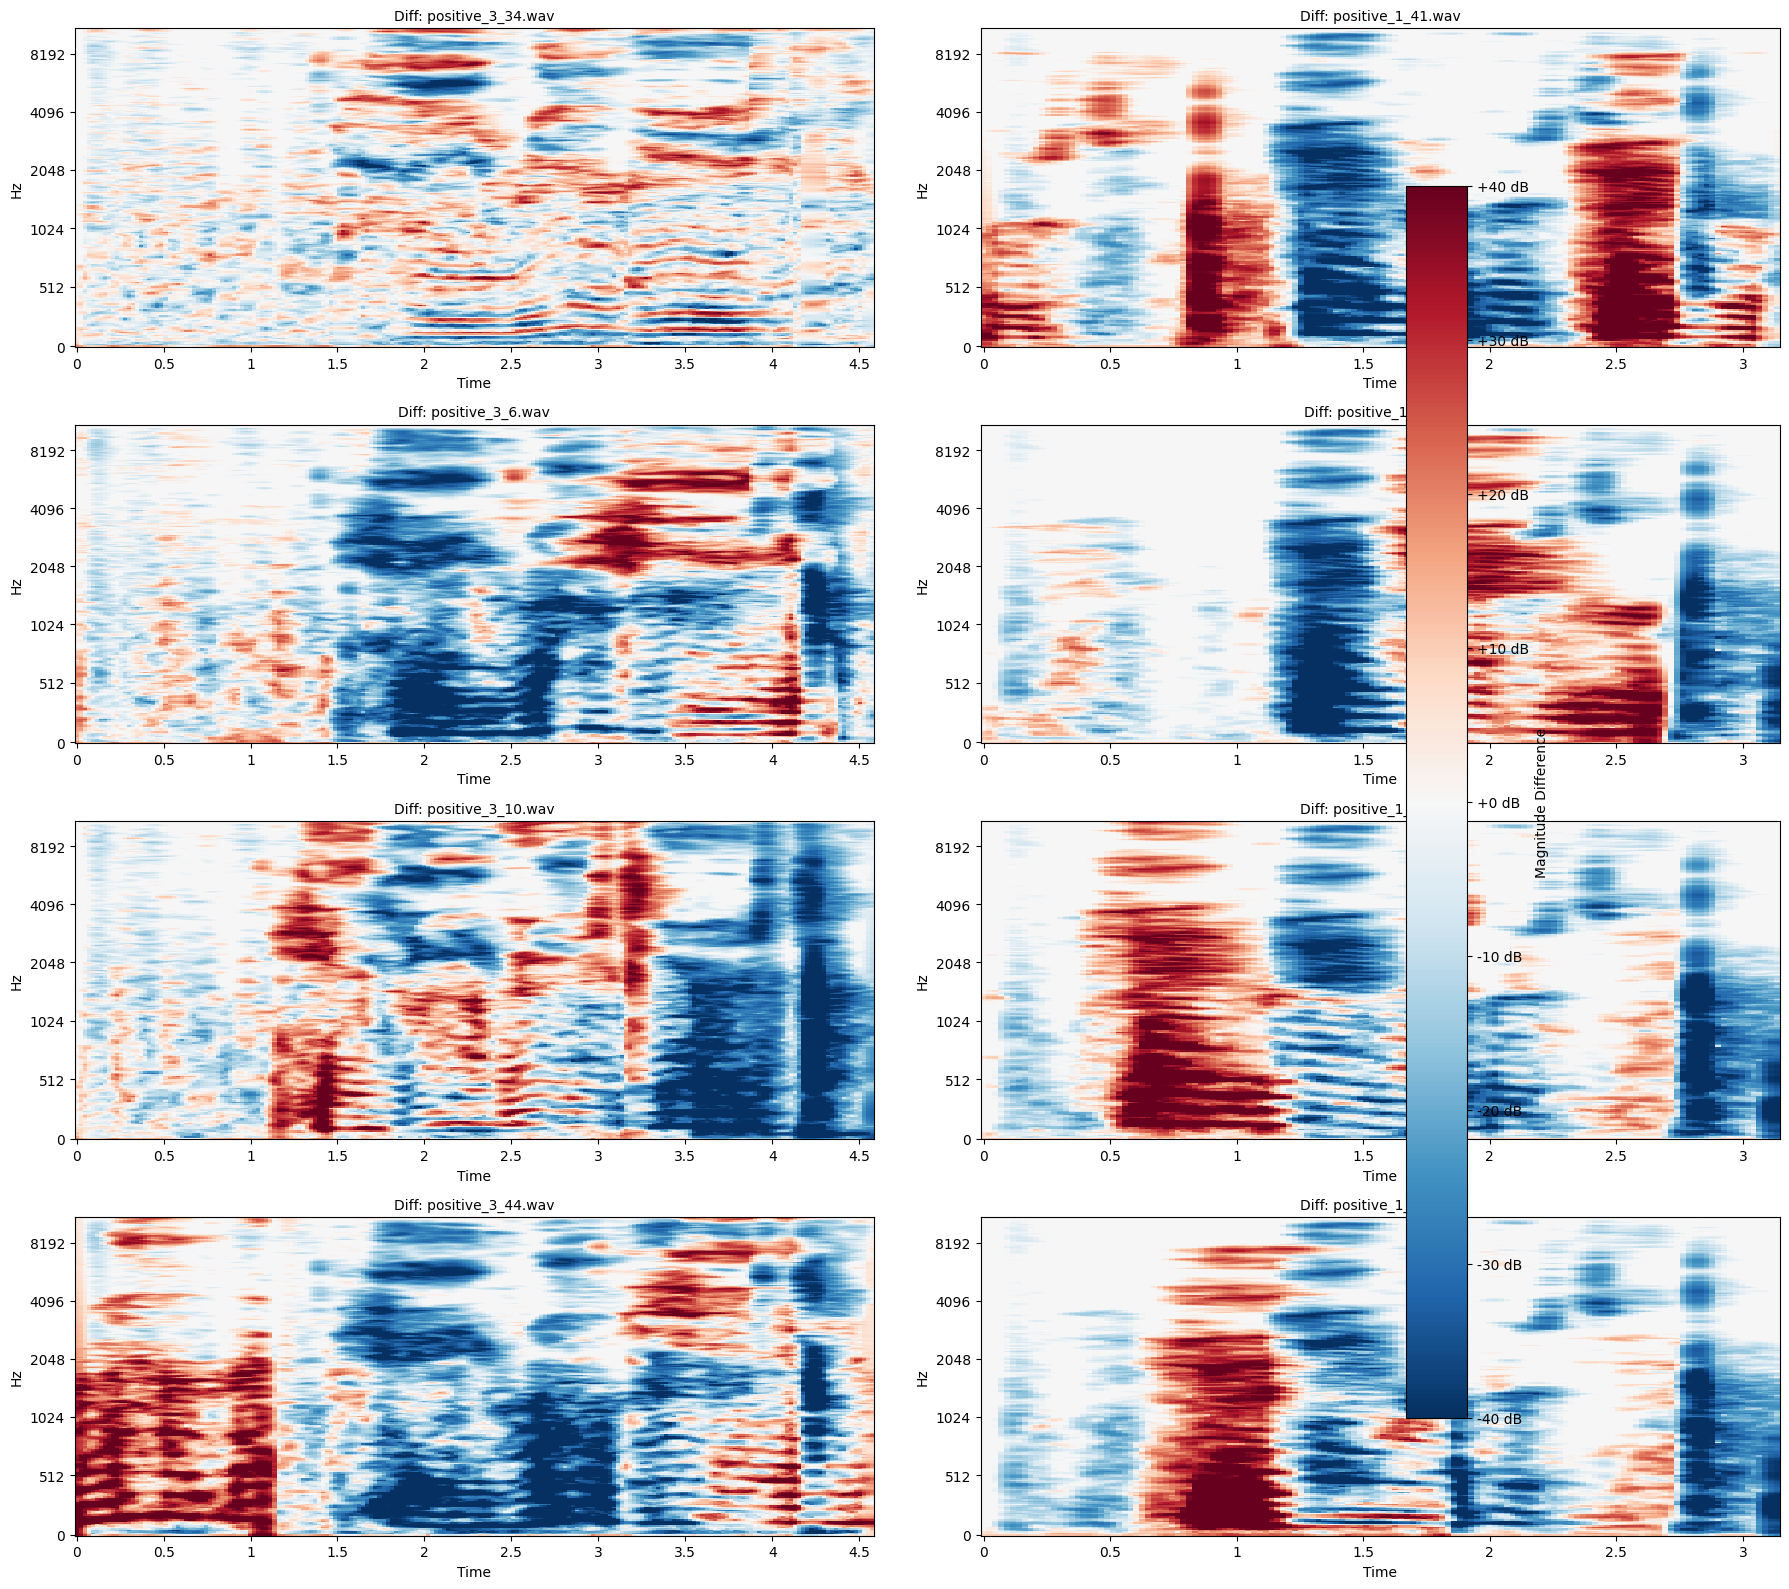

In [17]:

fig, ax = plt.subplots(x_axis, len(wav_files), figsize=(18, 4 * x_axis))

if len(wav_files) == 1:
    ax = ax.reshape(-1, 1)

for j, file in enumerate(wav_files):
    y_orig, S_orig, S_dB_orig, sr = get_mels_spectogram(file)

    k = file.split("/")[-1].replace(".wav", "")
    gen_audio_samples = gen_sample_dic[k]

    for i_gen in range(x_axis):
        gen_file_path = gen_audio_samples[i_gen]
        y_gen, S_gen, S_dB_gen , sr= get_mels_spectogram(gen_file_path)

        # Pad spectrograms to same width (-80dB is basically silence)
        max_width = max(S_dB_orig.shape[1], S_dB_gen.shape[1])
        S_dB_orig_pad = np.pad(S_dB_orig, ((0,0), (0, max_width - S_dB_orig.shape[1])), constant_values=-80)
        S_dB_gen_pad = np.pad(S_dB_gen, ((0,0), (0, max_width - S_dB_gen.shape[1])), constant_values=-80)

        S_diff = S_dB_gen_pad - S_dB_orig_pad

        img = librosa.display.specshow(S_diff, sr=sr, x_axis='time', y_axis='mel', 
                                       ax=ax[i_gen, j], cmap='RdBu_r', vmin=-40, vmax=40)
        
        gen_name = gen_file_path.split("/")[-1]
        ax[i_gen, j].set_title(f"Diff: {gen_name}", fontsize=10)

fig.colorbar(img, ax=ax, format='%+2.0f dB', label='Magnitude Difference')

fig.tight_layout()
plt.show()

# Creating Dataset


Checking file ./Dataset/positive_real/positive_1.wav
---> 48000


/tmp/ipykernel_105878/497651404.py:20: MatplotlibDeprecationWarning: Passing the NFFT parameter of specgram() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
/home/n/.conda/envs/ai_dev/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8280: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


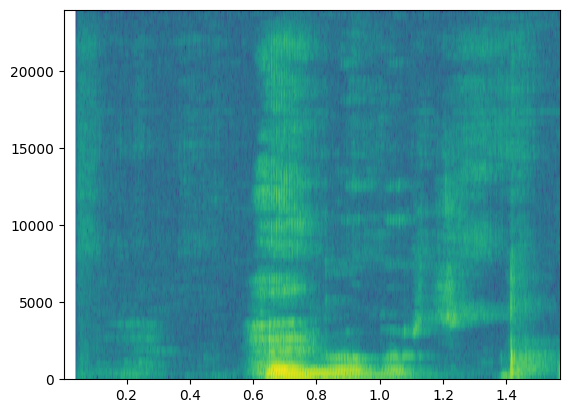

In [18]:
def graph_spectrogram(wav_file):
    """
    Generate and plot a spectrogram from a WAV file.
    
    Args:
        wav_file (str): Path to the WAV file
        
    Returns:
        np.ndarray: Power spectral density matrix (pxx)
    """
    rate, data = wavfile.read(wav_file)
    print("--->",rate)
    nfft = 200
    fs = rate
    noverlap = 120
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

print(f"Checking file {file}")
x = graph_spectrogram(file)

In [19]:
_, data = wavfile.read(backgrounds_files[0])
y_gen, sr = librosa.load(backgrounds_files[0])

S_gen = librosa.feature.melspectrogram(y=y_gen, sr=sr, hop_length=hop_length )
S_dB_gen = librosa.power_to_db(S_gen, ref=np.max)
print("Time steps in audio recording before spectrogram", data.shape)
print("Time steps in input after mel spectrogram", S_dB_gen.shape)

Time steps in audio recording before spectrogram (220500,)
Time steps in input after mel spectrogram (128, 431)


In [20]:
Tx = S_dB_gen.shape[1]
n_freq = S_dB_gen.shape[0] 
Ty = 105  # output timesteps for model

In [21]:
IPython.display.Audio(file)

In [22]:
generated_files = [generated_positive_directory+"/"+f for f in os.listdir(generated_positive_directory) if f.endswith('.wav')]

IPython.display.Audio(backgrounds_files[50]) 

In [23]:
IPython.display.Audio(negative_files[3]) 

In [24]:

backgrounds = [AudioSegment.from_wav(backgrounds_directory+"/"+f) for f in os.listdir(backgrounds_directory) if f.endswith('.wav')]
negatives = [AudioSegment.from_wav(negative_directory+"/"+f ) for f in os.listdir(negative_directory) if f.endswith('.wav')]
positives = [AudioSegment.from_wav(generated_positive_directory+"/"+f) for f in os.listdir(generated_positive_directory) if f.endswith('.wav')]


In [25]:
print("background for  5s audio : ", len(backgrounds[0]))
for i, f in enumerate(positives):
    print(f"positive[{i}] for 1 second " , len(f))
    if i == 10:
        break
for i, f in enumerate(negatives):
    print(f"negative[{i}] for 1 second " , len(f))
    if i == 20:
        break

background for  5s audio :  5000
positive[0] for 1 second  1570
positive[1] for 1 second  1570
positive[2] for 1 second  1570
positive[3] for 1 second  1570
positive[4] for 1 second  1570
positive[5] for 1 second  1570
positive[6] for 1 second  1570
positive[7] for 1 second  1570
positive[8] for 1 second  1570
positive[9] for 1 second  1570
positive[10] for 1 second  1570
negative[0] for 1 second  360
negative[1] for 1 second  579
negative[2] for 1 second  407
negative[3] for 1 second  541
negative[4] for 1 second  655
negative[5] for 1 second  358
negative[6] for 1 second  552
negative[7] for 1 second  1337
negative[8] for 1 second  355
negative[9] for 1 second  600


We will be working with 5s input audio, being 5 seconds noise + 1 second positive/negative. We need to place 1 second positive + 1 second negative in the 5 seconds beckground without overlap, but for this, we need to make sure that the number of samples from both positive and negative are not higher than background's samples. Of course it will not be, but let's check.

In [26]:
# Should be under 5000ms - let's verify
max([len(f) for f in positives]) + max([len(f) for f in negatives])

4657

Adding positives and negatives to the background without overlapping

In [27]:
def get_random_time_segment(segment_ms, max_duration=5000):
    """
    Generate a random time segment within a 5-second window.

    This function calculates a valid random position where an audio clip can be placed
    within a background track without exceeding its duration.

    Args:
        segment_ms (int): Duration of the audio segment to be placed, in milliseconds
        max_duration (int): Maximum duration of the background audio (default: 5000ms = 5 seconds)

    Returns:
        tuple: (segment_start, segment_end) in milliseconds
            - segment_start: Random starting position for the clip
            - segment_end: Ending position (start + duration - 1)

    Example:
        If segment_ms=1000 and max_duration=5000, the segment can start anywhere
        from 0ms to 4000ms, ensuring the segment ends before 5000ms.
    """
    # Calculate the maximum valid starting position to ensure the segment fits within max_duration
    # For example, if max_duration=5000ms and segment_ms=1000ms,
    # the segment can start anywhere from 0 to 4000ms (5000 - 1000)
    segment_start = np.random.randint(low=0, high=5000-segment_ms)

    # Calculate the end position based on the start and segment duration
    # Subtract 1 because if we start at 0ms and duration is 1000ms, we occupy 0-999ms
    segment_end = segment_start + segment_ms - 1

    return (segment_start, segment_end)


def is_overlapping(segment_time, previous_segments):
    """
    Check if a time segment overlaps with any previously placed segments.

    Two time segments overlap if they share any common time period. The overlap condition
    is mathematically defined as: start1 <= end2 AND end1 >= start2

    This ensures that audio clips don't interfere with each other in the training examples,
    maintaining clear boundaries between trigger words and negative samples.

    Args:
        segment_time (tuple): (start, end) time in milliseconds for the new segment to check
        previous_segments (list): List of tuples, where each tuple is (start, end) representing
                                 the time boundaries of already placed audio segments

    Returns:
        bool: True if the new segment overlaps with any existing segment, False otherwise

    Example:
        segment_time = (1000, 2000)
        previous_segments = [(500, 1500), (3000, 4000)]
        Returns True because (1000, 2000) overlaps with (500, 1500)

        Overlap occurs because:
        - segment_start (1000) <= previous_end (1500) AND
        - segment_end (2000) >= previous_start (500)
    """
    segment_start, segment_end = segment_time
    overlap = False

    # Iterate through all previously placed segments to check for any overlap
    for previous_start, previous_end in previous_segments:
        # Check overlap condition: the new segment overlaps if its start is before
        # the previous segment ends AND its end is after the previous segment starts
        if segment_start <= previous_end and segment_end >= previous_start:
            overlap = True
            break  # Exit early once overlap is detected for efficiency

    return overlap


def insert_audio_clip(background, audio_clip, previous_segments):
    """
    Insert an audio clip into a background track at a random non-overlapping position.

    This function is crucial for dataset creation in trigger word detection. It places
    audio clips (either trigger words or negative samples) into background audio at random
    positions while ensuring no overlap with previously inserted clips. This creates
    realistic training examples with multiple audio events.

    The function attempts to find a valid position up to 5 times. If all attempts result
    in overlaps, the clip is not inserted to avoid infinite loops.

    Args:
        background (AudioSegment): The background audio track (typically 5-10 seconds of ambient sound)
        audio_clip (AudioSegment): The audio clip to insert (trigger word or negative sample)
        previous_segments (list): List of (start, end) tuples representing time positions of
                                 already inserted audio clips. This list is modified in-place
                                 when a new clip is successfully inserted.

    Returns:
        tuple: Contains two elements:
            - new_background (AudioSegment): Background audio with the clip overlaid at the selected
                                            position. If insertion failed due to overlaps, returns
                                            the original background unchanged.
            - segment_time (tuple): (start, end) time in milliseconds where the clip was inserted.
                                   Returns (5000, 5000) if insertion failed after 5 attempts.

    Algorithm:
        1. Get a random time segment for the clip
        2. Check if it overlaps with existing segments
        3. If overlap exists, retry up to 5 times with new random positions
        4. If a valid position is found, overlay the clip and update previous_segments
        5. If all retries fail, return original background and (5000, 5000) as failure indicator

    Example:
        background = AudioSegment.from_wav("ambient.wav")  # 5 seconds
        trigger = AudioSegment.from_wav("activate.wav")    # 1 second
        previous = [(1000, 2000)]  # Already inserted clip at 1s-2s

        new_bg, position = insert_audio_clip(background, trigger, previous)
        # new_bg now has the trigger word overlaid at a random non-overlapping position
        # position might be (3000, 4000) indicating insertion at 3s-4s
    """
    # Get the duration of the audio clip in milliseconds
    # len() on AudioSegment returns duration in milliseconds
    segment_ms = len(audio_clip)

    # Step 1: Generate an initial random time segment for placing the clip
    # This uses get_random_time_segment() to ensure the clip fits within the background duration
    segment_time = get_random_time_segment(segment_ms)

    # Step 2: Check for overlaps and retry if necessary
    # We limit retries to 5 to prevent infinite loops in cases where the background
    # is heavily populated with clips and finding a valid position is difficult
    retry = 5
    while is_overlapping(segment_time, previous_segments) and retry >= 0:
        # Generate a new random position
        segment_time = get_random_time_segment(segment_ms)
        retry = retry - 1

    # Step 3: Insert the clip if a valid non-overlapping position was found
    if not is_overlapping(segment_time, previous_segments):
        # Add this segment's time range to previous_segments to track its position
        # This prevents future clips from overlapping with this one
        previous_segments.append(segment_time)

        # Step 4: Overlay the audio clip onto the background at the selected position
        # The overlay() method mixes the clip with the background starting at segment_time[0]
        # This is non-destructive mixing, not replacement
        new_background = background.overlay(audio_clip, position = segment_time[0])
    else:
        # If all 5 retry attempts resulted in overlaps, don't insert the clip
        # Return the original background unchanged
        new_background = background
        # Use (5000, 5000) as a sentinel value to indicate insertion failure
        # This is beyond the normal range for a 5-second background
        segment_time = (5000, 5000)

    return new_background, segment_time

In [28]:
np.random.seed(5)
audio_clip, segment_time = insert_audio_clip(backgrounds[0], positives[0], [(3790, 4400)])
audio_clip.export("Dataset/tests/inserted_positive.wav", format="wav")
print("Segment Time: ", segment_time)
IPython.display.Audio("Dataset/tests/inserted_positive.wav")

Segment Time:  (1725, 3294)


sanity checks: 0.0 0.0 0.0


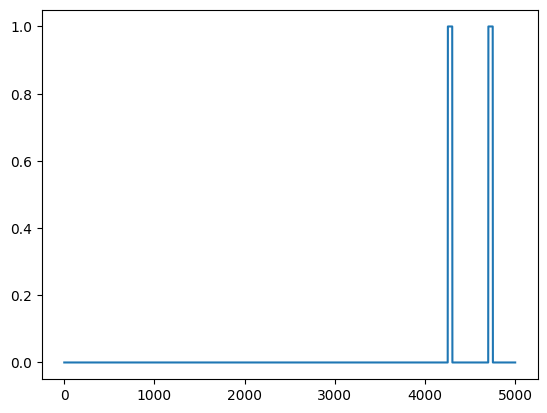

In [29]:
def insert_ones(y, segment_end_ms):
    """
    Update the label vector y. The labels of the 50 output steps strictly after the end of the segment 
    should be set to 1. By strictly we mean that the label of segment_end_y should be 0 while, the
    50 following labels should be ones.
    
    
    Arguments:
    y -- numpy array of shape (1, Ty), the labels of the training example
    segment_end_ms -- the end time of the segment in ms
    
    Returns:
    y -- updated labels
    """
    _, Ty = y.shape
    
    # Convert ms to spectrogram timesteps
    segment_end_y = int(segment_end_ms * Ty / 5000.0)
    
    if segment_end_y < Ty:
        # Label next 50 timesteps as positive
        for i in range(segment_end_y + 1, segment_end_y + 51):
            if i < Ty:
                y[0, i] = 1
    
    return y

arr1 = insert_ones(np.zeros((1, 5000)), 4700)
plt.plot(insert_ones(arr1, 4251)[0,:])
print("sanity checks:", arr1[0][1333], arr1[0][634], arr1[0][635])

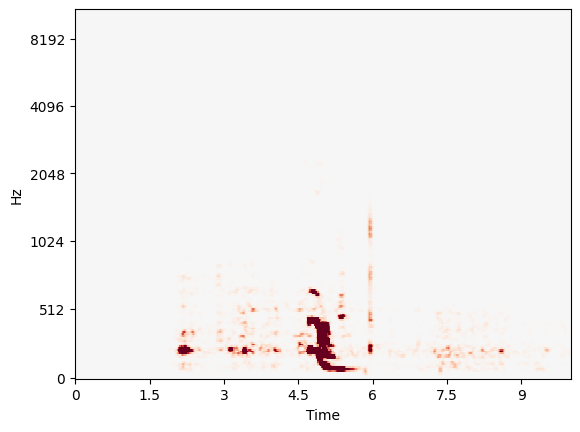

In [30]:
def match_target_amplitude(sound, target_dBFS):
    """
    Adjust the volume of an audio segment to match a target amplitude level.
    
    Args:
        sound (AudioSegment): Audio segment to adjust
        target_dBFS (float): Target amplitude in decibels relative to full scale
        
    Returns:
        AudioSegment: Audio segment with adjusted volume
    """
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)



def create_training_example(background, activates, negatives, Ty, sample_number = 0, plot_ = False):
    """
    Creates a training example with a given background, activates, and negatives.
    
    Arguments:
    background -- a 10 second background audio recording
    activates -- a list of audio segments of the word "activate"
    negatives -- a list of audio segments of random words that are not "activate"
    Ty -- The number of time steps in the output

    Returns:
    x -- the spectrogram of the training example
    y -- the label at each time step of the spectrogram
    """
    
    background = background - 20  # lower volume so clips stand out

    y = np.zeros((1, Ty))
    previous_segments = []
    
    # Randomly pick 0-2 trigger words to insert
    number_of_activates = np.random.randint(0, 3)
    random_indices = np.random.randint(len(activates), size=number_of_activates)
    random_activates = [activates[i] for i in random_indices]
    
    for one_random_activate in random_activates:
        background, segment_time = insert_audio_clip(background, one_random_activate, previous_segments)
        segment_start, segment_end = segment_time
        y = insert_ones(y, segment_end)

    # Add some random negative words too
    number_of_negatives = np.random.randint(0, 3)
    random_indices = np.random.randint(len(negatives), size=number_of_negatives)
    random_negatives = [negatives[i] for i in random_indices]

    for random_negative in random_negatives:
        background, _ = insert_audio_clip(background, random_negative, previous_segments)
  
    background = match_target_amplitude(background, -20.0)

    # Save and convert to spectrogram
    file_handle = background.export(f"Dataset/training_set/train_{sample_number}.wav", format="wav")
    y_gen, S_gen, S_dB_gen, sr = get_mels_spectogram(f"Dataset/training_set/train_{sample_number}.wav")
    
    if plot_:
        img = librosa.display.specshow(S_gen, sr=sr, x_axis='time', y_axis='mel', cmap='RdBu_r', vmin=-40, vmax=40)
    
    return S_gen, y

x, y = create_training_example(backgrounds[5], positives, negatives, Ty, plot_ = True)



In [31]:
IPython.display.Audio("./Dataset/training_set/train_0.wav")

In [32]:
np.random.seed(4543)
nsamples = 40000

def create_training_set(nsamples, backgrounds, positives, negatives, Ty):
    """
    Creates a training set of audio examples with corresponding labels.
    
    Arguments:
    nsamples -- number of training examples to create
    backgrounds -- list of background audio segments
    positives -- list of positive audio segments (trigger words)
    negatives -- list of negative audio segments (non-trigger words)
    Ty -- number of time steps in the output labels
 
    Returns:
    X -- numpy array of shape (nsamples, n_freq, Tx), spectrograms of training examples
    Y -- numpy array of shape (nsamples, 1, Ty), labels for each time step
    """
    used_combinations = set()
    X = []
    Y = []
    for i in range(0, nsamples):
        if i%100 == 0:
            print(i)
        x, y = create_training_example(backgrounds[i % len(backgrounds)], positives, negatives, Ty, i)
        sample_hash = hash(x.tobytes())
        
        if sample_hash not in used_combinations:
            used_combinations.add(sample_hash)
            X.append(x.swapaxes(0,1))
            Y.append(y.swapaxes(0,1))

    
    return X, Y
X, Y = create_training_set(nsamples, backgrounds, positives, negatives, Ty)
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

((37393, 431, 256), (37393, 105, 1))

In [33]:
import pickle

# Save datasets
with open('X.pkl', 'wb') as f:
    pickle.dump(X, f)

with open('Y.pkl', 'wb') as f:
    pickle.dump(Y, f)

# Load datasets
with open('X.pkl', 'rb') as f:
    X = pickle.load(f)

with open('Y.pkl', 'rb') as f:
    Y = pickle.load(f)

In [34]:
len(X), len(Y)

(37393, 37393)